## Machine learning module to multiply by 3

- Simple model creation to test out various of Manipulations that are possible to do using trained model

In [6]:
import torch
import torch.nn as nn
X = torch.tensor([[1],[2],[3],[4]] , dtype=torch.float32)
Y = torch.tensor([[3],[6],[9],[12]] , dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

X_test = torch.tensor([5] , dtype=torch.float32)

class LinearRegression(nn.Module):
    def __init__(self, input_dimensions , output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dimensions,output_dim)

    def forward(self,x):
        return self.lin(x)

model = LinearRegression(input_size , output_size)

#loss

print(f'Prediction before training f(5) = {model(X_test).item():.3f}')

n_itters = 90095
learning_rate = 0.0001

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr=learning_rate)

for epoch in range(n_itters):
    # prediction = foreard pass
    y_pred = model(X)


    #loss
    l = loss(Y, y_pred)

    #gradient dw = gradient(X,Y,y_pred)
    l.backward()

    #update weights
    optimizer.step()

    #zerro gradient
    optimizer.zero_grad()

    if epoch % 2 == 0:
        [w,b] = model.parameters()
        if epoch%2500==0:
            print(f'epoch {epoch + 1}: w = {w[0][0].item():3f} , loss = {l:8f} , inputs {X.shape} ')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

torch.save(model,'./storage/calculator.model')

4 1
Prediction before training f(5) = -2.676
epoch 1: w = -0.563538 , loss = 92.551842 , inputs torch.Size([4, 1]) 
epoch 2501: w = 2.560971 , loss = 0.242266 , inputs torch.Size([4, 1]) 
epoch 5001: w = 2.636560 , loss = 0.189941 , inputs torch.Size([4, 1]) 
epoch 7501: w = 2.663431 , loss = 0.163532 , inputs torch.Size([4, 1]) 
epoch 10001: w = 2.687697 , loss = 0.140802 , inputs torch.Size([4, 1]) 
epoch 12501: w = 2.710221 , loss = 0.121231 , inputs torch.Size([4, 1]) 
epoch 15001: w = 2.731101 , loss = 0.104382 , inputs torch.Size([4, 1]) 
epoch 17501: w = 2.750487 , loss = 0.089875 , inputs torch.Size([4, 1]) 
epoch 20001: w = 2.768458 , loss = 0.077386 , inputs torch.Size([4, 1]) 
epoch 22501: w = 2.785142 , loss = 0.066633 , inputs torch.Size([4, 1]) 
epoch 25001: w = 2.800622 , loss = 0.057374 , inputs torch.Size([4, 1]) 
epoch 27501: w = 2.814993 , loss = 0.049402 , inputs torch.Size([4, 1]) 
epoch 30001: w = 2.828352 , loss = 0.042538 , inputs torch.Size([4, 1]) 
epoch 32501

In [8]:
import sys
import torch
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self, input_dimensions , output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dimensions,output_dim)

    def forward(self,x):
        return self.lin(x)


model = torch.load('./storage/calculator.model')
model.eval()
print('14 multiply by 3 = ')
print(f'{model(torch.tensor([float(14)])).item():.0f}')

14 multiply by 3 = 
42


In [17]:
df=open('./storage/in.csv','w')
for i in range(0,871):
    df.write(str(i) + ',' + str(i * 3))
    df.write('\n')
df.close()

tensor([0.]) tensor([0.])
tensor([[666.],
        [729.],
        [458.],
        [745.],
        [457.],
        [735.],
        [685.],
        [599.],
        [634.],
        [ 29.],
        [845.],
        [800.]]) tensor([[1998.],
        [2187.],
        [1374.],
        [2235.],
        [1371.],
        [2205.],
        [2055.],
        [1797.],
        [1902.],
        [  87.],
        [2535.],
        [2400.]])
871 218
Prediction after training: f(5) = 15.000
Prediction after training: f(10) = 30.000
Prediction after training: f(1) = 3.000
graph(%to_calc : Float(1, 1, 1, 1, strides=[1, 1, 1, 1], requires_grad=0, device=cpu),
      %lin.bias : Float(1, strides=[1], requires_grad=1, device=cpu),
      %6 : Float(1, 1, strides=[1, 1], requires_grad=0, device=cpu)):
  %4 : Float(1, 1, 1, 1, strides=[1, 1, 1, 1], device=cpu) = onnx::MatMul(%to_calc, %6)
  %calculated : Float(1, 1, 1, 1, strides=[1, 1, 1, 1], requires_grad=1, device=cpu) = onnx::Add(%lin.bias, %4) # /opt/conda/lib/p

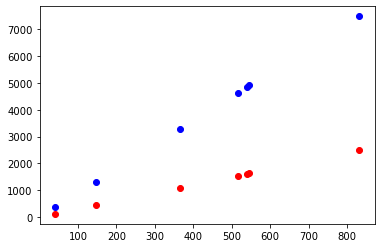

In [19]:
##loss functions with Torch implemented
# 1) Designe model (input , output size , forward pass)
# 2) Construct Loss and Optimizer
# 3) Training loop
#   - Forward pass : Compute prediction
#   - backward pass : gradients
#     - update our weights

import torch
import torch.nn as nn
import numpy as np
import math

from sklearn import datasets
import matplotlib.pyplot as plt
from torch.utils.data import Dataset , DataLoader

# 0) prepare data


class CalcDataset(Dataset):
    def __init__(self):
        # data loading

        X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
        self.x = torch.from_numpy(X_numpy.astype(np.float32))
        self.y = torch.from_numpy(Y_numpy.astype(np.float32))
        self.n_samples = self.y.shape[0]

        xy = np.loadtxt('./storage/in.csv' , delimiter=",",dtype=np.float32)
        self.x = torch.from_numpy(xy[:,[0]])
        self.y = torch.from_numpy(xy[:,[1]]) # n_samples 1
        self.n_samples = xy.shape[0]



    def __getitem__(self, index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.n_samples

dataset = CalcDataset()
first_data = dataset[0]
features,labels = first_data
print(features,labels)


dataloader = DataLoader(dataset=dataset , batch_size=12 , shuffle=True,num_workers=1)

dataitter = iter(dataloader)
data = dataitter.next()
features,labels = data
print(features,labels)

# 1)model

input_size = 1
output_size = 1

class LinearRegression(nn.Module):
    def __init__(self, input_dimensions , output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dimensions,output_dim)

    def forward(self,x):
        return self.lin(x)

model = LinearRegression(input_size , output_size)

#2) loss && optimizer
learning_rate=0.01


criterion = nn.MSELoss()

#def loss(y, y_predicted):
#    print(y, y_predicted)
#    exit()
#    return ((y_predicted - y)**2).mean()
#criterion = loss

#optimizer = torch.optim.Adadelta(model.parameters() , lr=learning_rate)
optimizer = torch.optim.Rprop(model.parameters() , lr=learning_rate) # [best]
## fatal optimizer = torch.optim.SparseAdam(model.parameters() , lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters() , lr=learning_rate)

#https://en.wikipedia.org/wiki/Rprop

#training loop
num_epoch = 100
total_samples = len(dataset)
n_itterations = math.ceil(total_samples/4)

print(total_samples,n_itterations)

for epoch in range(num_epoch):
    for i , (inputs, labels) in enumerate(dataloader):

        # prediction = foreard pass
        y_pred = model(inputs)

        # loss
        l = criterion(labels, y_pred)

        optimizer.zero_grad()
        l.backward()
        optimizer.step()

        if (i+1) % 150 == 0:
            #epoch 5085: w = 2.946607 , loss = 0.004022 , inputs torch.Size([4, 1])
            #epoch 2/2 , step 50/218 , inputs torch.Size([12, 1]) , loss =      nan

            print(f'epoch {epoch+1}/{num_epoch} , step {i+1}/{n_itterations} , inputs {inputs.shape} , loss = {l:8f}')


#plot
predicted = model(labels).detach().numpy()


X_test = torch.tensor([5] , dtype=torch.float32)
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
X_test = torch.tensor([10] , dtype=torch.float32)
print(f'Prediction after training: f(10) = {model(X_test).item():.3f}')
X_test = torch.tensor([1] , dtype=torch.float32)
print(f'Prediction after training: f(1) = {model(X_test).item():.3f}')

dummy_input = torch.randn(1,1,1,1)
input_names = [ "to_calc" ]
output_names = [ "calculated" ]

torch.onnx.export(model, dummy_input, "storage/calculator_lin.onnx", verbose=True, input_names=input_names, output_names=output_names)
# os.system('onnx-tf convert -i ./calculator.onnx -o ./calculator.pb')
#tensorflowjs_converter  ./calculator.pb ./calculator.json

plt.plot(inputs.numpy(),labels.numpy() , 'ro')
plt.plot(inputs.numpy(),predicted,'bo')
plt.show()

In [4]:
import os


class LinearRegression(nn.Module):
    def __init__(self, input_dimensions , output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dimensions,output_dim)

    def forward(self,x):
        return self.lin(x)

model = torch.load('calculator.model')
model.eval()
dummy_input = torch.randn(1)
input_names = [ "actual_input_1" ]
output_names = [ "output1" ]

torch.onnx.export(model, dummy_input, "calculator.onnx", verbose=True, input_names=input_names, output_names=output_names)

#pip install git+https://github.com/onnx/onnx-tensorflow.git
#onnx-tf convert -t tf -i /path/to/input.onnx -o /path/to/output.pb
#pip install tensorflow-addons
os.system('onnx-tf convert -i ./calculator/calculator.onnx -o ./calculator/calculator.pb')

# https://medium.com/@pnitsan/exporting-and-running-a-deep-learning-model-in-the-browser-including-lstm-a-straight-forward-574a766ef1d6

#tensorflowjs_converter  --input_format=tf_frozen_model --output_node_names='Calculator'  ./calculator.pb ./calculator.json

graph(%actual_input_1 : Float(1)
      %1 : Float(1, 1)
      %2 : Float(1)) {
  %3 : Float(1, 1) = onnx::Transpose[perm=[1, 0]](%1), scope: LinearRegression/Linear[lin]
  %4 : Float(1) = onnx::MatMul(%actual_input_1, %3), scope: LinearRegression/Linear[lin]
  %output1 : Float(1) = onnx::Add(%4, %2), scope: LinearRegression/Linear[lin]
  return (%output1);
}



32512